# Cálculo das rotas para o request

Demonstra a escolha das rotas durante a execução dos protocolos para os requests.

In [1]:
# Componentes básicos da rede
from components import Network, Controller, Qubit
# Funções auxiliares para executar as aplicações
from components.qkd.app import *
# Funções auxiliares 
import numpy as np

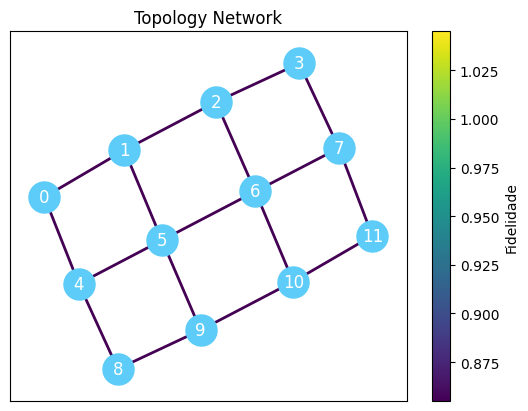

In [2]:
# Criação da rede e do controlador
rede = Network()
controlador = Controller(rede)
rede.set_lattice_topology(3, 4)
rede.draw()

In [3]:
# Gerando requisições aleatórias
n_requests = 10
apps = ["BB84", "E91", "B92"]
# Cases podem ser de 0 a 4
case = 1
requests = generate_qkd_requests(rede, n_requests, apps, case)
requestsCopia = requests.copy()

In [4]:
# Alocando rotas para os requests baseados no algoritmo de menor caminho
rota = controlador.allocate_routes(requests, 'shortest')

Requests ordenados por prioridade:  ['E91: 3-8 (P:5 Key: 100)', 'E91: 6-1 (P:4 Key: 200)', 'E91: 1-10 (P:4 Key: 400)', 'E91: 11-1 (P:3 Key: 300)', 'BB84: 6-3 (P:3 Key: 300)', 'B92: 3-0 (P:3 Key: 200)', 'BB84: 0-9 (P:2 Key: 500)', 'B92: 9-0 (P:1 Key: 100)', 'E91: 3-2 (P:1 Key: 400)', 'BB84: 6-2 (P:1 Key: 300)']
Rotas: [[3, 2, 1, 0, 4, 8]]
Rota atual trabalhada:  [3, 2, 1, 0, 4, 8]
Rotas: [[6, 5, 1]]
Rota atual trabalhada:  [6, 5, 1]
Rotas: [[1, 5, 9, 10]]
Rota atual trabalhada:  [1, 5, 9, 10]
Rotas: [[11, 7, 3, 2, 1]]
Rota atual trabalhada:  [11, 7, 3, 2, 1]
Rotas: [[6, 2, 3]]
Rota atual trabalhada:  [6, 2, 3]
Rotas: [[3, 2, 1, 0]]
Rota atual trabalhada:  [3, 2, 1, 0]
Rotas: [[0, 4, 8, 9]]
Rota atual trabalhada:  [0, 4, 8, 9]
Rotas: [[9, 8, 4, 0]]
Rota atual trabalhada:  [9, 8, 4, 0]
Rotas: [[3, 2]]
Rota atual trabalhada:  [3, 2]
Rotas: [[6, 2]]
Rota atual trabalhada:  [6, 2]


In [5]:
# Alocando rotas para os requests baseados em todos os caminhos
rota = controlador.allocate_routes(requestsCopia, 'all')

Requests ordenados por prioridade:  ['E91: 3-8 (P:5 Key: 100)', 'E91: 6-1 (P:4 Key: 200)', 'E91: 1-10 (P:4 Key: 400)', 'E91: 11-1 (P:3 Key: 300)', 'BB84: 6-3 (P:3 Key: 300)', 'B92: 3-0 (P:3 Key: 200)', 'BB84: 0-9 (P:2 Key: 500)', 'B92: 9-0 (P:1 Key: 100)', 'E91: 3-2 (P:1 Key: 400)', 'BB84: 6-2 (P:1 Key: 300)']
Rotas: [[3, 2, 1, 0, 4, 8], [3, 2, 1, 5, 4, 8], [3, 2, 1, 5, 9, 8], [3, 2, 6, 5, 4, 8], [3, 2, 6, 5, 9, 8], [3, 2, 6, 10, 9, 8], [3, 7, 6, 5, 4, 8], [3, 7, 6, 5, 9, 8], [3, 7, 6, 10, 9, 8], [3, 7, 11, 10, 9, 8], [3, 2, 1, 0, 4, 5, 9, 8], [3, 2, 1, 5, 6, 10, 9, 8], [3, 2, 6, 5, 1, 0, 4, 8], [3, 2, 6, 10, 9, 5, 4, 8], [3, 2, 6, 7, 11, 10, 9, 8], [3, 7, 6, 2, 1, 0, 4, 8], [3, 7, 6, 2, 1, 5, 4, 8], [3, 7, 6, 2, 1, 5, 9, 8], [3, 7, 6, 5, 1, 0, 4, 8], [3, 7, 6, 10, 9, 5, 4, 8], [3, 7, 11, 10, 6, 5, 4, 8], [3, 7, 11, 10, 6, 5, 9, 8], [3, 7, 11, 10, 9, 5, 4, 8], [3, 2, 1, 0, 4, 5, 6, 10, 9, 8], [3, 2, 1, 5, 6, 7, 11, 10, 9, 8], [3, 2, 6, 10, 9, 5, 1, 0, 4, 8], [3, 2, 6, 7, 11, 10, 9, 5, 